In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
data = pd.read_csv('pima-data.csv')
data.shape

(768, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B2261D2240>,
      dtype=object)

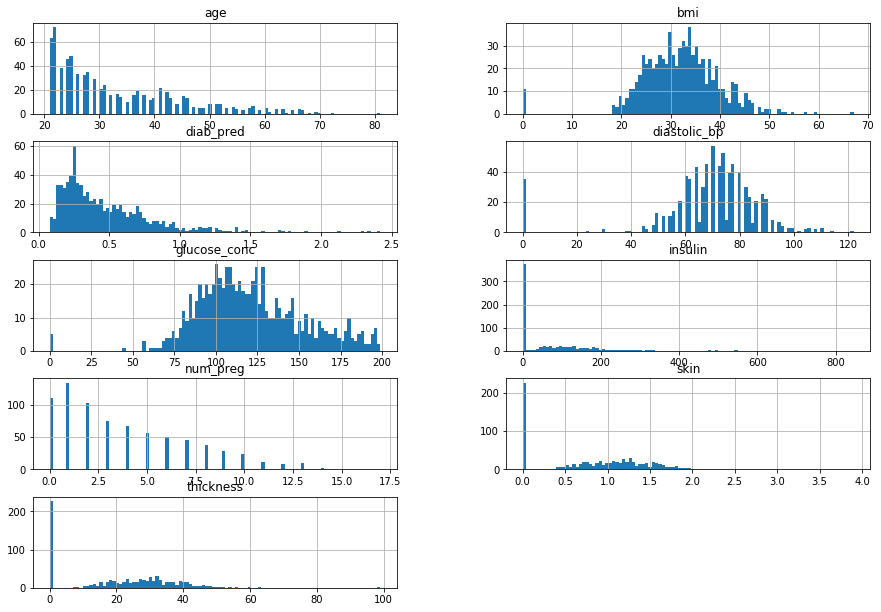

In [4]:
#Histogram 
columns = list(data)[0:-1]
data[columns].hist(stacked = False,bins = 100,figsize=(15,30),layout = (14,2))

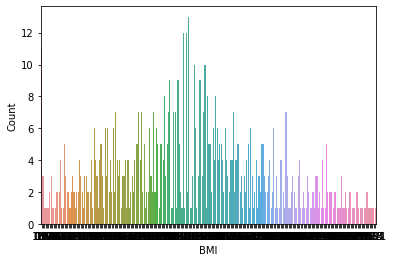

In [5]:
sns.barplot(x = data.bmi.value_counts().index , y = data.bmi.value_counts().values)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

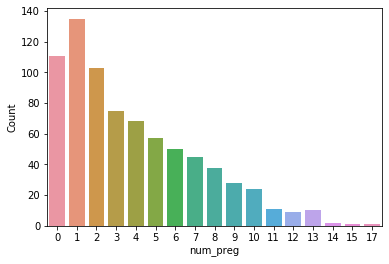

In [6]:
sns.barplot(x = data.num_preg.value_counts().index , y = data.num_preg.value_counts().values)
plt.xlabel('num_preg')
plt.ylabel('Count')
plt.show()

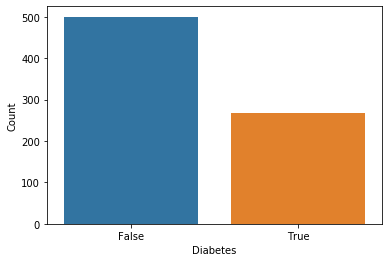

In [7]:
sns.countplot(data.diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

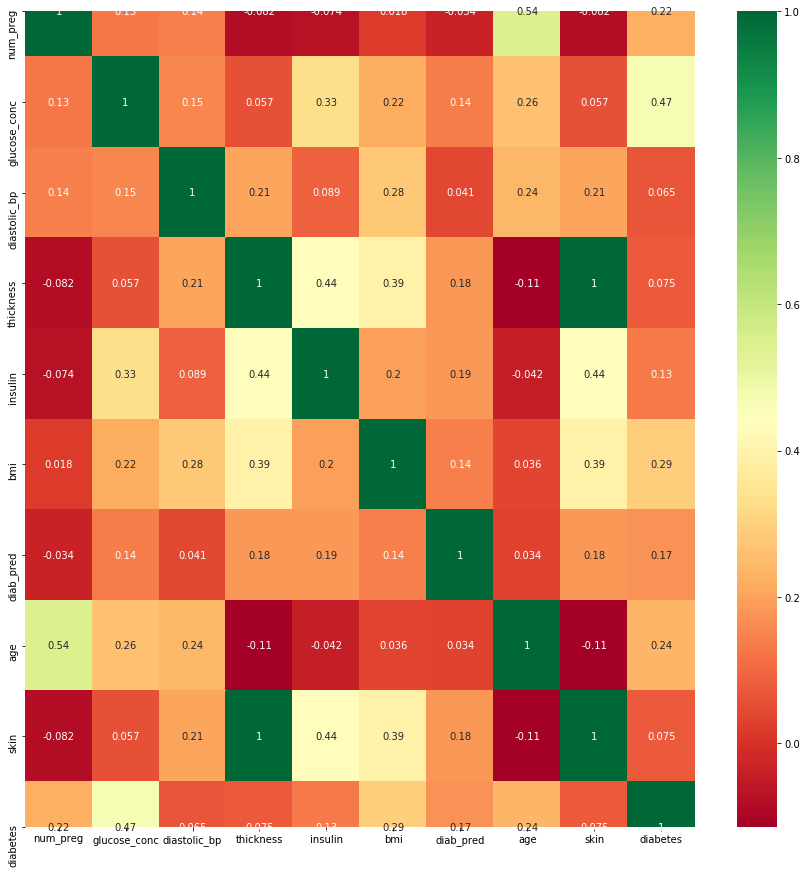

In [8]:
#Correlation Matrix 
 
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize =(15,15))
g = sns.heatmap(data[top_corr_features].corr() , annot = True , cmap = 'RdYlGn') 

In [9]:
#Changing the boolean to number 

diabetes_map = {True : 1 , False : 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [10]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [12]:
n_true = len(data.loc[data['diabetes'] == True])
n_false = len(data.loc[data['diabetes'] == False])


print('Number of True cases : {0}({1:2.2f}%)'.format(n_true ,(n_true / (n_true + n_false))*100))
print('Number of False cases : {0}({1:2.2f}%)'.format(n_false,(n_false / (n_true + n_false))*100))

Number of True cases : 268(34.90%)
Number of False cases : 500(65.10%)


In [13]:
#Start building the models 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [14]:
x = data.drop(['diabetes'] , axis = 1)
y = data.diabetes.values

X_train, X_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [15]:
fill_values = Imputer(missing_values=0,strategy = 'mean',axis = 0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Support Vector Machine 

In [16]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("SVC accuracy : {:.2f}%".format(svm.score(X_test,y_test)*100))

SVC accuracy : 69.48%


# Naive Bayes 

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("NB Accuracy : {:.2f}".format(nb.score(X_test,y_test)*100))

NB Accuracy : 79.87


# KNN Model 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
print("KNN Accuracy : {:.2f}".format(knn.score(X_test,y_test)*100))

KNN Accuracy : 71.43


# Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train,y_train)
print('Random Forest accuracy : {: .2f}%'.format(rf.score(X_test,y_test)*100))

Random Forest accuracy :  80.52%


# XG Boost 

In [20]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(X_train , y_train)
print('XG Boost : {:.2f}%'.format(xg.score(X_test,y_test) * 100))

XG Boost : 81.82%
